
Imports



In [239]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import math

Load the Image




(1000, 1000, 3)


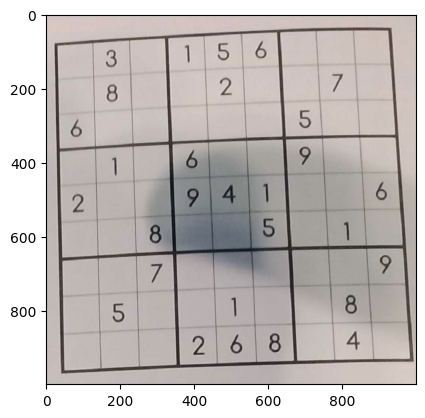

In [240]:
#Done: 1,2,3,4,,5,6,7,9,10,11,12,,13,14 suii
#Failed:  8, 15, 16

imgGroup = [cv2.imread('Project Test Cases-20231212/01.jpg'),
       cv2.imread('Project Test Cases-20231212/02.jpg'),
       cv2.imread("Project Test Cases-20231212/03.jpg"),
       cv2.imread("Project Test Cases-20231212/04.jpg"),
       cv2.imread("Project Test Cases-20231212/05.jpg"),
       cv2.imread("Project Test Cases-20231212/06.jpg"),
       cv2.imread("Project Test Cases-20231212/07.jpg"),
       cv2.imread("Project Test Cases-20231212/08.jpg"),
       cv2.imread("Project Test Cases-20231212/09.jpg"),
       cv2.imread("Project Test Cases-20231212/10.jpg"),
       cv2.imread("Project Test Cases-20231212/11.jpg"),
       cv2.imread("Project Test Cases-20231212/12.jpg"),
       cv2.imread("Project Test Cases-20231212/13.jpg"),
       cv2.imread("Project Test Cases-20231212/14.jpg"),
       cv2.imread("Project Test Cases-20231212/15.jpg"),
       cv2.imread("Project Test Cases-20231212/16.jpg")]



# imgGroup = [cv2.imread('/content/01-Normal.jpg'),
#        cv2.imread('/content/02-TheMightyFinger.jpg'),
#        cv2.imread("/content/03-WhereBorder.jpg"),
#        cv2.imread("/content/04-CompressoEspresso.jpg"),
#        cv2.imread("/content/05-Ya3amSheel2elCoinYa3am.jpg"),
#        cv2.imread("/content/06-FarAndCurved.jpg"),
#        cv2.imread("/content/07-2elNoor2ata3.jpg"),
#        cv2.imread("/content/08-MeshShayef7agaYa3am.jpg"),
#        cv2.imread("/content/09-Normal2.jpg"),
#        cv2.imread("/content/10-Mal7wFelfel.jpg"),
#        cv2.imread("/content/11-FlashBang.jpg"),
#        cv2.imread("/content/12-BrokenPrinter.jpg"),
#        cv2.imread("/content/13-DarkMode.jpg"),
#        cv2.imread("/content/14-Sine.jpg"),
#        cv2.imread("/content/15-GoneWithTheWind.jpg"),
#        cv2.imread("/content/16-SomethingWentTerriblyWrongHere.jpg")]

number = 2
img = imgGroup[number-1].copy()

print(img.shape)
plt.imshow(img, cmap="gray")


Convert to Grayscale

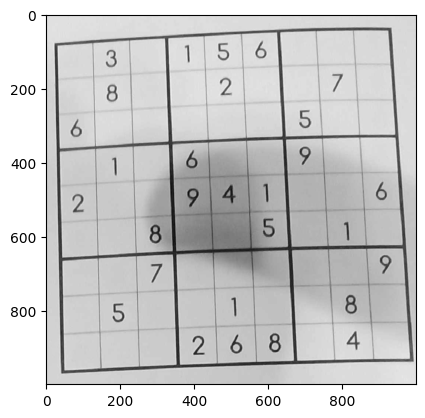

In [241]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image  , cmap="gray")

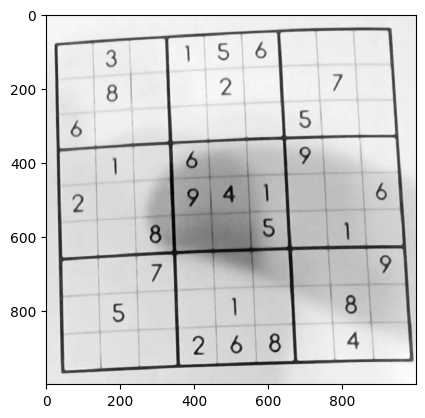

In [242]:
mean1 = cv2.medianBlur(gray_image.astype(np.uint8),5)
mean2 = cv2.medianBlur(mean1,5)
mean3 = cv2.medianBlur(mean2,5)
mean5 = cv2.medianBlur(mean3,3)
mean5 = (mean5 - mean5.min()) * (255/(mean5.max() - mean5.min()))
plt.imshow(mean5, cmap="gray")

In [243]:
dft_img = np.fft.fft2(mean3)
dft_img_shift = np.fft.fftshift(dft_img)
# plt.imshow(np.log(np.abs(dft_img_shift)), cmap = 'gray');

In [244]:
mask = np.zeros(dft_img.shape)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), 120, (255,255,255), -1).astype(np.uint8)
mask = cv2.GaussianBlur(mask, (21,21), 0)
dft_img_shifted = np.fft.fftshift(dft_img)
dft_img_shifted_lowpass = np.multiply(dft_img_shifted, mask)
img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted_lowpass))
# fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
# ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
# ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
# ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
# ax2.imshow(np.abs(img), cmap = 'gray')

In [245]:
img1 = np.fft.ifft2(np.fft.ifftshift(dft_img))
img1 = np.abs(img1)

# plt.imshow(img1, cmap="gray")

Adaptive Thresholding

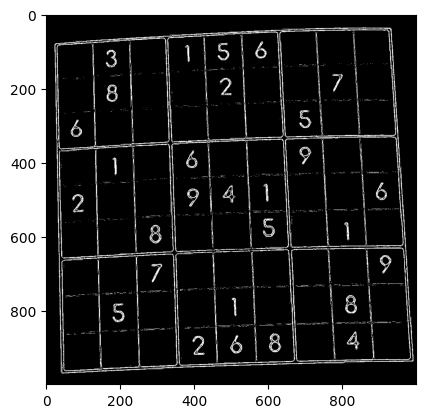

In [246]:

img_gray_threshed = cv2.adaptiveThreshold(src=img1.astype(np.uint8),
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=5,
    C=3
)

plt.imshow(img_gray_threshed, cmap="gray")

In [247]:
mean4 = cv2.medianBlur(img_gray_threshed,3)
closed_grid = np.zeros_like(mean4, dtype = np.uint8)
closed_grid = cv2.morphologyEx(img_gray_threshed, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9)))
# plt.imshow(closed_grid, cmap="gray")

In [248]:
maxArea = -1
x = -1
contours, _ = cv2.findContours(closed_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
selected_contours = []
sudoku_square = np.zeros(img_gray_threshed.shape, np.uint8)
for i in range(len(contours)):
  area = cv2.contourArea(contours[i])
  if area > maxArea:
     maxArea = area
     x = i


peri = cv2.arcLength(contours[x],True)
corners = cv2.approxPolyDP(contours[x],0.06*peri,True)



selected_contours.append(contours[x])
cv2.fillPoly(sudoku_square, pts=selected_contours, color= (255,255,255))
print(corners)

#######
min1 = 999999
min1Index = -1
for i in range(4):
  if corners[i][0][1] < min1:
    min1 = corners[i][0][1]
    min1Index = i

min2 = 999999
min2Index = -1
for i in range(4):
  if i == min1Index:
    continue
  if corners[i][0][1] < min2:
    min2 = corners[i][0][1]
    min2Index = i

c1 = 0
c2 = 0

if corners[min1Index][0][0] < corners[min2Index][0][0]:
  c1 =  corners[min1Index][0]
  c2 = corners[min2Index][0]
else:
  c2 =  corners[min1Index][0]
  c1 = corners[min2Index][0]

#####
max1 = -999999
max1Index = -1
for i in range(4):
  if corners[i][0][1] > max1:
    max1 = corners[i][0][1]
    max1Index = i

max2 = -999999
max2Index = -1
for i in range(4):
  if i == max1Index:
    continue
  if corners[i][0][1] > max2:
    max2 = corners[i][0][1]
    max2Index = i

c3 = 0
c4 = 0

if corners[max1Index][0][0] < corners[max2Index][0][0]:
  c3 =  corners[max1Index][0]
  c4 = corners[max2Index][0]
else:
  c4 =  corners[max1Index][0]
  c3 = corners[max2Index][0]


print(c1)
print(c2)
print(c3)
print(c4)

######

# plt.imshow(sudoku_square, cmap="gray")

[[[934  39]]

 [[ 23  82]]

 [[ 42 970]]

 [[993 936]]]
[23 82]
[934  39]
[ 42 970]
[993 936]


Extract Edges using Canny

In [249]:
dx = cv2.Sobel(sudoku_square,cv2.CV_16S,1,0,None,5,1,5)
dy = cv2.Sobel(sudoku_square,cv2.CV_16S,0,1,None,5,1,5)
canny_img = cv2.Canny(dx,dy,230,255,None,True)

# plt.imshow(canny_img, cmap="gray")

In [250]:

hough_lines = cv2.HoughLines(
    image=canny_img,
    rho=1,  # Distance resolution of the accumulator in pixels.
    theta=0.00120,  # Angle resolution of the accumulator in radians.
    threshold=250,  # Voting threshold for accumulator.
    lines=None,
    min_theta=0,  # Minimum angle to check for lines in radians.
    max_theta=math.pi  # Maximum angle to check for lines in radians.
)


tmp_imgy = np.zeros_like(img_gray_threshed, dtype = np.uint8)
for rho, theta in hough_lines[:,0]:
    # Mapping from polar (rho, theta) to cartesian (x0, y0)
    x0 = math.cos(theta) * rho
    y0 = math.sin(theta) * rho
    # Create an extension to the points
    pt1 = (int(x0 + 2000*(-math.sin(theta))), int(y0 + 2000*(math.cos(theta))))
    pt2 = (int(x0 - 2000*(-math.sin(theta))), int(y0 - 2000*(math.cos(theta))))
    cv2.line(tmp_imgy, pt1, pt2, (255,0,0), 1, cv2.LINE_AA)


# tmp_imgy = cv2.erode(tmp_imgy,cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
# plt.imshow(tmp_imgy, cmap='gray')




Perspective Transform

In [251]:
input_points = np.float32([c1,c2, c3, c4])
width = img.shape[1]
height = img.shape[0]

converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_gray_threshed, matrix, (width, height))
# plt.imshow(img_output, cmap="gray")


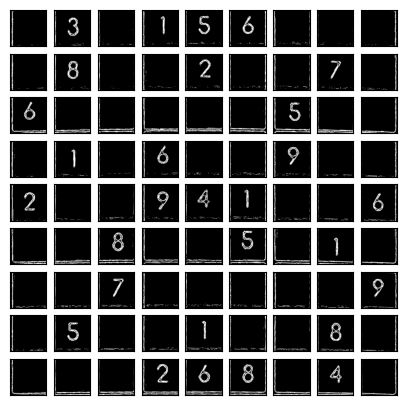

In [252]:
M = img_output.shape[0] // 9
N = img_output.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_output[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

In [253]:
import random
# El a5eera please
###
# 1: 11, 12
# 2: 64, 58
# 3: 45, 46
# 4: 11, 10
# 5: 18, 16
# 6: 30, 27
# 7: 16, 16
# 8: 63, 65
# 9: 34, 31
###

def getnum(number_tile):
    mean4 = cv2.medianBlur(number_tile,3)
    myimg = cv2.morphologyEx(number_tile, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
    myimg = cv2.threshold(number_tile, 100, 255, cv2.THRESH_BINARY)
    myimg = myimg[1].astype(np.uint8)

    myimg = cv2.Canny(myimg, 30, 150)

    max = -1
    x = -1

    contours, _ = cv2.findContours(myimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    selected_contours = []
    num = np.zeros(myimg.shape, np.uint8)
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if area > max:
            max = area
            x = i

    selected_contours.append(contours[x])
    cv2.fillPoly(num, pts=selected_contours, color= (255,255,255))


    num = num & myimg

    hh = num.shape[0]
    ww = num.shape[1]


    # get contours (presumably just one around the nonzero pixels) 
    contours = cv2.findContours(num, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)

    # recenter
    startx = (ww - w)//2
    starty = (hh - h)//2
    result = np.zeros_like(num)
    result[starty:starty+h,startx:startx+w] = num[y:y+h,x:x+w]

    img_dimensions = result.shape

    x = img_dimensions[0]
    y = img_dimensions[1]


    horizotal_lines = np.zeros_like(result, dtype = np.uint8)

    horizotal_lines = cv2.line(horizotal_lines, (0, 28), (x, 28), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 37), (x, 37), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 42), (x, 42), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 48), (x, 48), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 55), (x, 55), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 62), (x, 62), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 69), (x, 69), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 75), (x, 75), (255, 255, 255), 1)
    horizotal_lines = cv2.line(horizotal_lines, (0, 82), (x, 82), (255, 255, 255), 1)
    

    vertical_lines = np.zeros_like(result, dtype = np.uint8)

    vertical_lines = cv2.line(vertical_lines, (28, 0), (28, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (37, 0), (37, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (42, 0), (42, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (48, 0), (48, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (55, 0), (55, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (62, 0), (62, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (69, 0), (69, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (75, 0), (75, y), (255, 255, 255), 1)
    vertical_lines = cv2.line(vertical_lines, (82, 0), (82, y), (255, 255, 255), 1)
    

    
    
    outh = horizotal_lines & result
    outv = vertical_lines & result

    horizontal_count = 0
    vertical_count = 0

    for i in range(outh.shape[0]):
        for j in range(outh.shape[1]):
            if outh[i][j] == 255:
                horizontal_count += 1

    for i in range(outv.shape[0]):
        for j in range(outv.shape[1]):
            if outv[i][j] == 255:
                    vertical_count += 1

    print(f"Horizontal Intersections: {horizontal_count}")
    print(f"Vertical Intersections: {vertical_count}")

    ###

    # 1: 23, 16
    # 2: 43, 39
    # 3: 40, 45
    # 4: 35, 36
    # 5: 39, 38
    # 6: 38, 45
    # 7: 24, 28
    # 8: 51, 44
    # 9: 41, 43

    ###

    hor = [23, 43, 40, 35, 39, 38, 24, 51, 41]
    ver = [16, 39, 45, 36, 38, 45, 28, 44, 43]


    potential_hor = []
    potential_ver = []

    for i in range(9):
        hor_diff = np.abs(hor[i] - horizontal_count)
        ver_diff = np.abs(ver[i] - vertical_count)
        if hor_diff <= 5:
            potential_hor.append(i + 1)
        if ver_diff <= 5:
            potential_ver.append(i + 1)



    try:
        candidates = np.intersect1d(potential_hor, potential_ver)
        r = random.randint(0, len(candidates) - 1)

        return candidates[r]
    except:
        return 0




In [254]:
nums = np.zeros((9, 9))

for i in range(9):
    for j in range(9):
        nums[i][j] = getnum(number_tiles[i][j])

print(nums)



Horizontal Intersections: 2
Vertical Intersections: 2
Horizontal Intersections: 14
Vertical Intersections: 18
Horizontal Intersections: 9
Vertical Intersections: 17
Horizontal Intersections: 2
Vertical Intersections: 2
Horizontal Intersections: 22
Vertical Intersections: 12
Horizontal Intersections: 33
Vertical Intersections: 24
Horizontal Intersections: 2
Vertical Intersections: 2
Horizontal Intersections: 4
Vertical Intersections: 5
Horizontal Intersections: 6
Vertical Intersections: 7
Horizontal Intersections: 5
Vertical Intersections: 2
Horizontal Intersections: 27
Vertical Intersections: 17
Horizontal Intersections: 2
Vertical Intersections: 2
Horizontal Intersections: 2
Vertical Intersections: 3
Horizontal Intersections: 25
Vertical Intersections: 22
Horizontal Intersections: 3
Vertical Intersections: 3
Horizontal Intersections: 2
Vertical Intersections: 2
Horizontal Intersections: 8
Vertical Intersections: 3
Horizontal Intersections: 3
Vertical Intersections: 8
Horizontal Inters

In [255]:
def textize_sudoku(board):
    sudoku_ocr_text = ''
    for i, row in enumerate(board):
        sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ ' if (i%3 == 0) else ' │           │           │           │ '
        sudoku_ocr_text += '\n'
        sudoku_ocr_text += ' │ '
        for j, cell in enumerate(row): sudoku_ocr_text += f"{cell if cell != 0 else ' '} {' ' if (j%3 != 2) else '│'} "
        sudoku_ocr_text += '\n'
    sudoku_ocr_text += ' ├───────────┼───────────┼───────────┤ '
    return sudoku_ocr_text


def find_next_empty_cell(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, num, row, col):
    for i in range(9):  # row and column checks
        if board[row][i] == num and col != i: return False
        if board[i][col] == num and row != i: return False

    # Check box
    box_row = (row // 3) * 3
    box_col = (col // 3) * 3
    for i in range(box_row, box_row + 3):
        for j in range(box_col, box_col + 3):
            if board[i][j] == num and (i, j) != (row, col):
                return False
    return True

def solve(board):
    empty_cell_pos = find_next_empty_cell(board)
    if empty_cell_pos == None: return True  # No empty cells; board is solved
    row, col = empty_cell_pos
    for num in range(1, 10):
        if is_valid(board, num, row, col):  # Find a valid value to proceed with
            board[row][col] = num  # 'num' seems valid (so far), proceed with it
            if solve(board): return True  # Try to solve the rest of the board
            board[row][col] = 0  # Couldn't continue? Then 'num' was wrong! :(
    return False

def solve_sudoku(board):
    sudoku_to_solve = np.copy(board)
    solve(sudoku_to_solve)
    solved_sudoku = []
    for i in range(9):
        solved_sudoku.append([])
        for j in range(9):
            solved_sudoku[i].append("\033[1m"+str(board[i][j])+"\033[0m" if (board[i][j] != 0) else "\033[91m"+str(sudoku_to_solve[i][j])+"\033[0m")
    return solved_sudoku


print(textize_sudoku(solve_sudoku(nums.astype(int))))

KeyboardInterrupt: 